# Clusters

In [1]:
# Importamos librerías y generamos los datos:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=3, random_state=1, cluster_std=1.2)

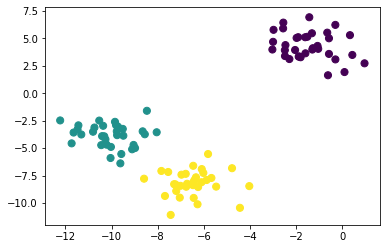

In [2]:
# Graficamos:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

## Clustering jerárquico aglomerativo


Empezaremos por clasificar con este método.

In [3]:
# Importamos la librería para la vinculación
from scipy.cluster.hierarchy import linkage

In [4]:
# Escogemos el método ward para el linkage (la vinculación)
Z = linkage(X, 'ward')

In [5]:
from scipy.cluster.hierarchy import fcluster

In [6]:
k = 3 # Elegimos tres clusters
clusters = fcluster(Z, k, criterion="maxclust")
clusters # Máximo de clusters = 3

array([1, 2, 2, 2, 3, 3, 3, 2, 1, 1, 2, 2, 3, 1, 3, 3, 3, 1, 2, 2, 3, 2,
       3, 1, 2, 3, 3, 1, 1, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 3, 3, 2, 1, 2,
       2, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 3, 2, 2, 1, 1, 2, 3, 3, 2, 2, 3,
       1, 3, 1, 2, 2, 2, 3, 1, 1, 2, 3, 3, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1,
       2, 1, 3, 1, 1, 2, 2, 3, 3, 1, 3, 1], dtype=int32)

In [7]:
# Puesto que la funcion inicia la clasificacion en 1, lo cambiamos a 0
clusters_2 = []
for i in clusters:
    if i == 1:
        clusters_2.append(0)
    if i == 2:
        clusters_2.append(1)
    if i == 3:
        clusters_2.append(2)

In [8]:
# Se clasificó todo correctamente
clusters_2 == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Método K-means

In [9]:
# Para este método importamos la siguiente libreria:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=3) # Elegimos 3 clusters
model.fit(X) # Lo aplicamos a nuestros datos

KMeans(n_clusters=3)

In [11]:
model.labels_

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [12]:
# Nuevamente vemos que se ha clasificado todo correctamente
model.labels_ == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Matriz de confusión y accuracy

In [13]:
# Para ver de una mejor manera los resultados:
from sklearn.metrics import confusion_matrix

In [15]:
mat = confusion_matrix(y, model.labels_)
mat.T

array([[34,  0,  0],
       [ 0, 33,  0],
       [ 0,  0, 33]], dtype=int64)

In [16]:
import seaborn as sns

Text(33.0, 0.5, 'true value')

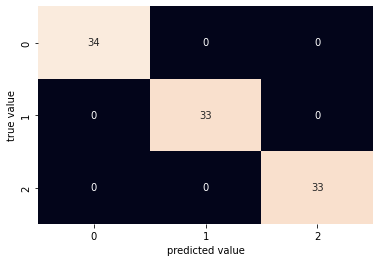

In [17]:
sns.heatmap(mat, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y, model.labels_)

1.0

Se obtienen los mismos resultados tanto con el método jerárquico aglomerativo que con el de K means